In [1]:
import tensorflow as tf
models = tf.keras.models
layers = tf.keras.layers

In [2]:
model = models.Sequential()

# Conv Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(720, 480, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the layers
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(720, activation='relu'))

# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))  # 이진 분류이므로 sigmoid 사용

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



c:\Users\hungh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# import sixtick.python.easy as s
# image_path_arr = ['../image/KEMP_IMG_DATA_1.png', '../image/KEMP_IMG_DATA_Error_2.png', '../image/KEMP_IMG_DATA_Error_12.png']
# image_arr_weight = [8,1,1]
# path = s.sample(image_path_arr, 1, counts=image_arr_weight)
# x_train = []
# y_train = []
# for i in range(20):
#     path = s.sample(image_path_arr, 1, counts=image_arr_weight)[0]
#     isok = not 'Error' in path 
#     x_train.append(s.cv.imread(path, s.cv.IMREAD_GRAYSCALE))
#     y_train.append(isok)
# x_train = s.np.array(x_train)
# y_train = s.np.array(y_train)

# x_val = []
# y_val = []
# for i in range(10):
#     path = s.sample(image_path_arr, 1, counts=image_arr_weight)[0]
#     isok = not 'Error' in path 
#     x_val.append(s.cv.imread(path, s.cv.IMREAD_GRAYSCALE))
#     y_val.append(isok)
# x_val = s.np.array(x_val)
# y_val = s.np.array(y_val)


sixtick
	pytyon
		easy.py
easy.py loaded


In [6]:
import sixtick.python.easy as s
def get_train_data_kemp(to_gray = False) :
    image_path_arr = ['../image/KEMP_IMG_DATA_1.png', '../image/KEMP_IMG_DATA_Error_2.png', '../image/KEMP_IMG_DATA_Error_12.png']
    image_arr_weight = [8,1,1]
    path = s.sample(image_path_arr, 1, counts=image_arr_weight)[0]
    if to_gray : 
        x_train = s.cv.imread(path)
        y_train = not 'Error' in path
        return x_train, s.np.array([y_train])
    else : 
        x_train = s.cv.imread(path, s.cv.IMREAD_GRAYSCALE)
        y_train = not 'Error' in path
        return x_train.reshape(-1, 720, 480), s.np.array([y_train]) #s.np.array([int(y_train)])


In [30]:
# x, y =  get_train_data_kemp()
# x.reshape(-1, 720,480).shape
# y.shape

(1,)

In [31]:
# # 모델 학습
# x_train, y_train = get_train_data_kemp()
# x_val, y_val = get_train_data_kemp()
# history = model.fit(
#     x_train,  # 입력 데이터 (훈련 데이터)
#     y_train,  # 출력 데이터 (훈련 데이터의 레이블)
#     # steps_per_epoch=100,
#     epochs=1,
#     validation_data=(x_val, y_val)  # 검증 데이터와 검증 레이블
#     # validation_steps=50
#     # ,verbose=1
# )


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 3.2648 - val_accuracy: 0.0000e+00 - val_loss: 1959.6205


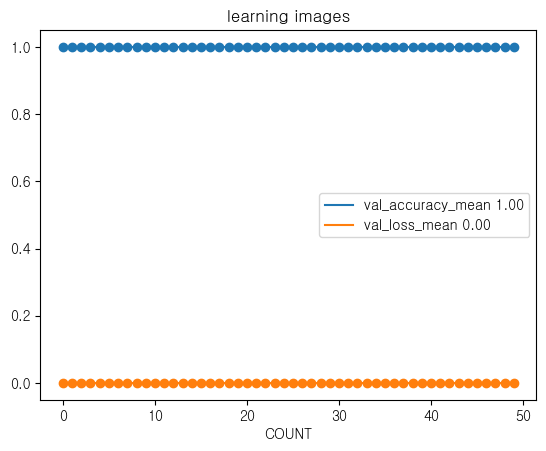

50


In [5]:
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='gulim')
history_df = pd.DataFrame()

# plt.ion()  # Interactive 모드를 켬 (실시간 업데이트)
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for i in range(50):
    x_train, y_train = get_train_data_kemp()
    x_val, y_val = get_train_data_kemp()
    # print(len(history))
    if len(history_df) == 50:
        history_df.drop(0, inplace=True)
        history_df.reset_index(drop=True, inplace=True)
    history = model.fit(
        x_train,  # 입력 데이터 (훈련 데이터)
        y_train,  # 출력 데이터 (훈련 데이터의 레이블)
        # steps_per_epoch=100,
        epochs=1,
        validation_data=(x_val, y_val)  # 검증 데이터와 검증 레이블
        # validation_steps=50
        ,verbose=0
    )
    if len(history_df) == 0 :
        history_df = pd.DataFrame(history.history)
        history_df['val_accuracy_mean'] = history_df['val_accuracy']
        history_df['val_loss_mean'] = history_df['val_loss']
    else :
        history_df = pd.concat([history_df, pd.DataFrame(history.history)], axis=0)
        history_df.reset_index(drop=True, inplace=True)
        history_df.loc[i, 'val_accuracy_mean'] = history_df['val_accuracy'].mean()
        history_df.loc[i, 'val_loss_mean'] = history_df['val_loss'].mean()
    
    # ax.clear()  # 기존 플롯을 지움
    plt.scatter(range(len(history_df)), history_df['val_accuracy'])
    plt.scatter(range(len(history_df)), history_df['val_loss'])
    plt.plot(range(len(history_df)), history_df['val_accuracy_mean'], label=f'val_accuracy_mean {history_df.loc[i, 'val_accuracy_mean']:.2f}')
    plt.plot(range(len(history_df)), history_df['val_loss_mean'], label=f'val_loss_mean {history_df.loc[i, 'val_loss_mean']:.2f}')
    plt.xlabel('COUNT')

    # plt.draw()
    # plt.pause(0.1)
    plt.title('learning images')
    plt.legend()
    plt.show()

    print(i+1)
    clear_output(wait=True)

# plt.ioff()  # Interactive 모드 끔
# plt.show()

In [7]:
model.save('learning150.keras')

In [ ]:
models.load_model()

In [ ]:
# TODO 저장된 모델 불러오기, 실제 이미지 넣어보기, 이미지를 보여주면서 검증하기, 이미지에 O X 표시하기

In [12]:
import numpy as np
loss_arr = []
accuracy_arr = []
for i in range(100):
    x, y = get_train_data_kemp()
    # predictions = model.predict(x)
    # print(predictions, y)
    loss, accuracy = model.evaluate(x, y)
    loss_arr.append(round(loss, 1))
    accuracy_arr.append(round(accuracy, 1))
    # print(round(loss, 2), accuracy)
# print('Predictions:')
# print(np.round(predictions))
print(np.mean(loss_arr), np.mean(accuracy_arr))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 1.0000 - loss: 1.1166e-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 1.0000 - loss: 1.1166e-25

In [35]:
# 이미지 띄우면서 검증하기
import numpy as np
import cv2 as cv
import sixtick.python.easy as s
loss_arr = []
accuracy_arr = []
count = 100
for i in range(count):
    x_org, y = get_train_data_kemp(True)
    
    image_name = f'img_OK {i}'
    if not y :
        image_name = f'img_BAD {i}'
    #cv.imshow(image_name, x)
    s.image_center_show(image_name, x_org)

    x = s.cv.cvtColor(x_org, s.cv.COLOR_BGR2GRAY).reshape(-1, 720, 480)
    print(x.shape)
    loss, accuracy = model.evaluate(x, y)
    if accuracy == 1 and y == True :
        # cv.drawMarker(x_org, (20,20), color=(0,0,255), markerType=cv.marker, markerSize=20)
        cv.circle(x_org, (480//2,720//2), radius=150, thickness=20, color=(255,0,0)) # 원
    elif accuracy == 1 and y == False: 
        cv.drawMarker(x_org, (480//2,720//2), color=(0,0,255), markerType=cv.MARKER_TILTED_CROSS, markerSize=300, thickness=20)
    else : 
        cv.drawMarker(x_org, (480//2,720//2), color=(0,255,0), markerType=cv.MARKER_STAR, markerSize=300, thickness=20)
    s.image_center_show(image_name, x_org)
    loss_arr.append(round(loss, 1))
    accuracy_arr.append(round(accuracy, 1))
    cv.waitKey(500)



cv.destroyAllWindows()
print(np.mean(loss_arr), np.mean(accuracy_arr))

(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 1.0000 - loss: 0.0000e+00
(1, 720, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 0.0000e+00

In [6]:

history_df.drop(0, inplace=True)
history_df.reset_index(drop=True, inplace=True)
# history_df.drop('index',axis=1, inplace=True)
len(history_df)
print(history_df)

    accuracy          loss  val_accuracy      val_loss
0        1.0  0.000000e+00           1.0  0.000000e+00
1        1.0  0.000000e+00           1.0  0.000000e+00
2        1.0  0.000000e+00           0.0  7.846743e+03
3        1.0  0.000000e+00           1.0  0.000000e+00
4        1.0  0.000000e+00           1.0  0.000000e+00
5        1.0  0.000000e+00           1.0  0.000000e+00
6        0.0  1.443919e+04           1.0  0.000000e+00
7        0.0  8.276235e+03           1.0  0.000000e+00
8        1.0  0.000000e+00           1.0  0.000000e+00
9        0.0  5.173548e+02           0.0  5.488678e+02
10       0.0  5.488678e+02           0.0  1.930887e+02
11       1.0  0.000000e+00           1.0  4.250103e-34
12       1.0  1.014383e-19           1.0  0.000000e+00
13       1.0  0.000000e+00           1.0  0.000000e+00
14       1.0  0.000000e+00           1.0  0.000000e+00
15       1.0  0.000000e+00           1.0  0.000000e+00
16       0.0  5.416466e+02           1.0  0.000000e+00
17       0

In [58]:
import pandas as pd

# 예시 DataFrame 두 개
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

df2 = pd.DataFrame({
    'A': [7, 8, 9],
    'B': [10, 11, 12]
})

# 1. 수직으로 결합 (행 추가)
df_vertical = pd.concat([df1, df2], axis=0)
print(df_vertical)

# 2. 수평으로 결합 (열 추가)
df_horizontal = pd.concat([df1, df2], axis=1)
print(df_horizontal)


   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12
   A  B  A   B
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12
